In [1007]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [1008]:
data = pd.read_csv("./data/AB_NYC_2019.csv")


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

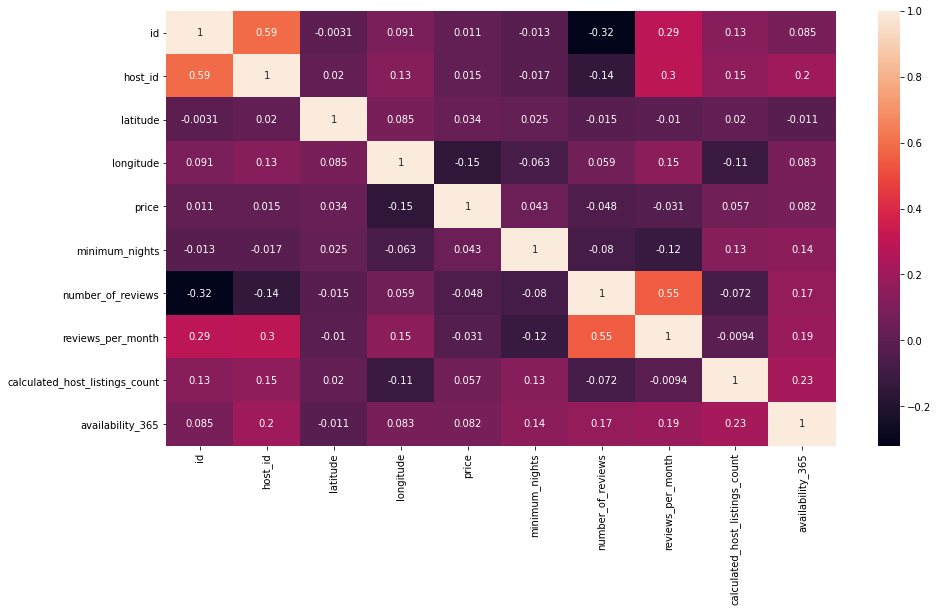

In [1009]:
corr = data.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

In [1010]:
#Checking for missing values
data.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [1011]:
#imputing missing values
data.fillna({'reviews_per_month':0}, inplace=True)


In [1012]:
#Rechecking if missing values are still remaining
data.isnull().sum()
#dropping these because not required for prediction
data = data.drop(columns = ["id","host_name", "name",'last_review',"latitude",'longitude', 'host_id'])


In [1013]:
#As these are outliers detected in visualization of R
data  = data[data["price"]<1000]


In [1014]:
#Checking if there's any row with price more than 1000
data[data["price"]>1000]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


[Text(0.5, 0, '')]

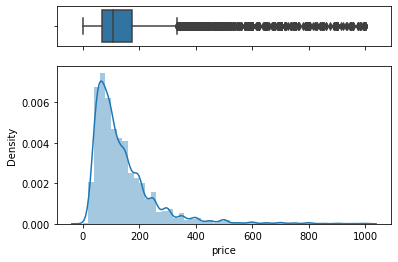

In [1015]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(data["price"], ax=ax_box)
sns.distplot(data["price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

[Text(0.5, 0, '')]

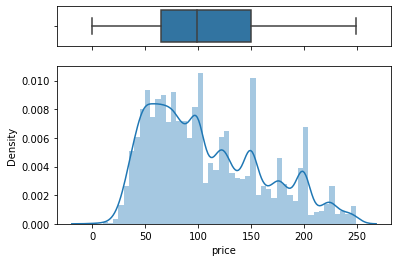

In [1016]:
#hist_price2=dataset["price"][dataset["price"]<250].hist()
dataSet =data[data["price"]<250] 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(dataSet["price"], ax=ax_box)
sns.distplot(dataSet["price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [1017]:
#as we notice above we have a normal distrbution between 0-250, we would use only 0-250
data =data[data["price"]<250] 

In [1018]:
#all the neighbourhood
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Prospect Heights', 'Washington Heights',
       'Upper East Side', 'Woodside', 'Carroll Gardens', 'Gowanus',
       'Flatlands', 'Cobble Hill', 'Flushing', 'Sunnyside', 'St. George',
       'Highbridge', 'Financial District', 'Morningside Heights',
       'Jamaica', 'Middle Village', 'Ridgewood', 'NoHo',
       'Ditmars Steinway', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria',
       'Clason Point', 'Eastchester', 'Kingsbridge', 'Boerum Hill',
     

In [1019]:
data['neighbourhood'].value_counts()

Bedford-Stuyvesant    3560
Williamsburg          3451
Harlem                2487
Bushwick              2404
Upper West Side       1570
                      ... 
Neponsit                 1
Willowbrook              1
New Dorp                 1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 219, dtype: int64

In [1020]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

[Text(0.5, 0, '')]

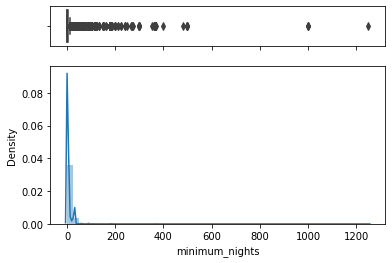

In [1021]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(data["minimum_nights"], ax=ax_box)
sns.distplot(data["minimum_nights"], ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [1022]:
data.loc[(data.minimum_nights >10),"minimum_nights"]=10


[Text(0.5, 0, '')]

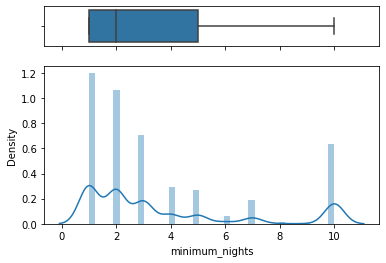

In [1023]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 2)})
sns.boxplot(data["minimum_nights"], ax=ax_box)
sns.distplot(data["minimum_nights"], ax=ax_hist)
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [1024]:
#only using columns that I need for modelling 
#columnsInlcuded = ['price', 'room_type', 'minimum_nights', 'availability_365' ]
#columnsInlcuded = ['price', 'neighbourhood_group', 'room_type', 'minimum_nights']
#dummyData = data[columnsInlcuded]
#dummyData.head(5)

In [1025]:
#dummyData['room_type']=dummyData['room_type'].factorize()[0]
#dummyData['neighbourhood_group']=dummyData['neighbourhood_group'].factorize()[0]

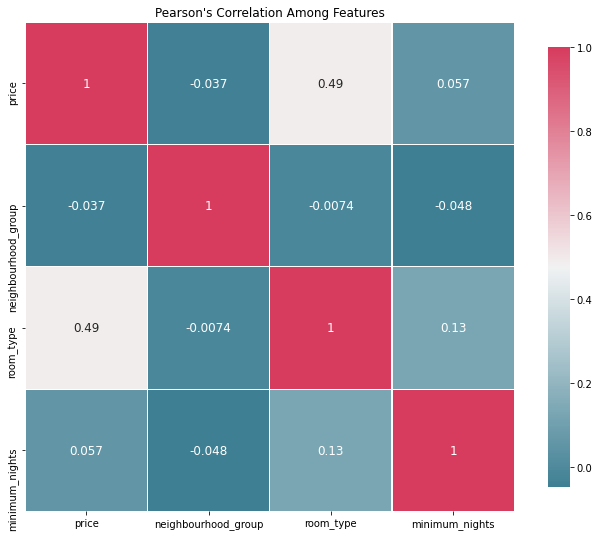

In [1026]:
#Checking for corr
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        dummyData.corr(), 
        cmap = sns.diverging_palette(220, 4, as_cmap = True),  
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Features")
plt.show()

In [1027]:

newData = pd.get_dummies(data, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
newData.drop(["neighbourhood"], axis=1, inplace=True)

In [1028]:
newData

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,0.00,2,9,1,0,0,0,1,0
48891,40,4,0,0.00,2,36,1,0,0,0,1,0
48892,115,10,0,0.00,1,27,0,1,0,0,0,0
48893,55,1,0,0.00,6,2,0,1,0,0,0,1


In [1029]:
X_1= newData.loc[:, newData.columns != 'price']
y_1 = newData["price"]


In [1030]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.30, random_state=50)

## Linear Regression

In [1031]:
lmModel = LinearRegression().fit(X_train1, y_train1)
y_pred1 = lmModel.predict(X_test1)

In [1032]:
rmse1 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred1))
rmse1


37.8212092161542

In [1033]:
print('R-squared train score: {:.3f}'.format(lmModel.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(lmModel.score(X_test1, y_test1)))

R-squared train score: 0.502
R-squared test score: 0.501


#### Ridge Regression:
### Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
### Minimization objective = LS Obj + α * (sum of square of coefficients)
### Lasso Regression:
#### Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
### Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

In [1034]:

ridge = Ridge()
ridge.fit(X_train1, y_train1)

y_pred2= ridge.predict(X_test1)

In [1035]:

print('R-squared train score: {:.3f}'.format(ridge.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(ridge.score(X_test1, y_test1)))


R-squared train score: 0.502
R-squared test score: 0.501


In [1036]:
rmse2 = np.sqrt(metrics.mean_squared_error(y_test1, y_pred2))
rmse2

37.820925641488415

In [1037]:

lasso = Lasso(alpha=0.01,max_iter = 10000)
lasso.fit(X_train1, y_train1)
y_pred3= lasso.predict(X_test1)

In [1038]:

print('R-squared train score: {:.3f}'.format(lasso.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(lasso.score(X_test1, y_test1)))


R-squared train score: 0.502
R-squared test score: 0.501


In [1039]:
lassoRMSE = np.sqrt(metrics.mean_squared_error(y_test1, y_pred3))
lassoRMSE

37.81968003574733

## Decision Tree Regressor 

### The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

In [1040]:
DTree=DecisionTreeRegressor(min_samples_leaf=32)
DTree.fit(X_train1,y_train1)
y_pred4= DTree.predict(X_test1)

In [1041]:

print('R-squared train score: {:.3f}'.format(DTree.score(X_train1, y_train1)))
print('R-squared test score: {:.3f}'.format(DTree.score(X_test1, y_test1)))

R-squared train score: 0.567
R-squared test score: 0.505


In [1042]:
dtTreeRMSE = np.sqrt(metrics.mean_squared_error(y_test1, y_pred4))
dtTreeRMSE

37.66100138886354